In [50]:
#My first Machine Learning Model

#Importing the packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')
from sklearn.model_selection import train_test_split,cross_val_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics
%matplotlib inline

In [51]:
#Creating a dataframe
filename='C:\\Users\harvinder singh\Desktop\DataSets\Iris.csv'
iris=pd.read_csv(filename,index_col=0)
#Reading first 5 rows
print(iris.head())
print(iris.tail())


    SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm      Species
Id                                                                       
1             5.1           3.5            1.4           0.2  Iris-setosa
2             4.9           3.0            1.4           0.2  Iris-setosa
3             4.7           3.2            1.3           0.2  Iris-setosa
4             4.6           3.1            1.5           0.2  Iris-setosa
5             5.0           3.6            1.4           0.2  Iris-setosa
     SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm         Species
Id                                                                           
146            6.7           3.0            5.2           2.3  Iris-virginica
147            6.3           2.5            5.0           1.9  Iris-virginica
148            6.5           3.0            5.2           2.0  Iris-virginica
149            6.2           3.4            5.4           2.3  Iris-virginica
150           

In [52]:
#Information regarding the dataframe
print(iris.info())
#Dimensions of the dataframe
print(iris.shape)


<class 'pandas.core.frame.DataFrame'>
Int64Index: 150 entries, 1 to 150
Data columns (total 5 columns):
SepalLengthCm    150 non-null float64
SepalWidthCm     150 non-null float64
PetalLengthCm    150 non-null float64
PetalWidthCm     150 non-null float64
Species          150 non-null object
dtypes: float64(4), object(1)
memory usage: 7.0+ KB
None
(150, 5)


In [53]:
#Analyzing statistical information about the dataset
print(iris.describe())

       SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm
count     150.000000    150.000000     150.000000    150.000000
mean        5.843333      3.054000       3.758667      1.198667
std         0.828066      0.433594       1.764420      0.763161
min         4.300000      2.000000       1.000000      0.100000
25%         5.100000      2.800000       1.600000      0.300000
50%         5.800000      3.000000       4.350000      1.300000
75%         6.400000      3.300000       5.100000      1.800000
max         7.900000      4.400000       6.900000      2.500000


In [54]:
#Dropping duplicates if any
iris.drop_duplicates()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
Id,,,,,
1,5.1,3.5,1.4,0.2,Iris-setosa
2,4.9,3.0,1.4,0.2,Iris-setosa
3,4.7,3.2,1.3,0.2,Iris-setosa
4,4.6,3.1,1.5,0.2,Iris-setosa
5,5.0,3.6,1.4,0.2,Iris-setosa
6,5.4,3.9,1.7,0.4,Iris-setosa
7,4.6,3.4,1.4,0.3,Iris-setosa
8,5.0,3.4,1.5,0.2,Iris-setosa
9,4.4,2.9,1.4,0.2,Iris-setosa


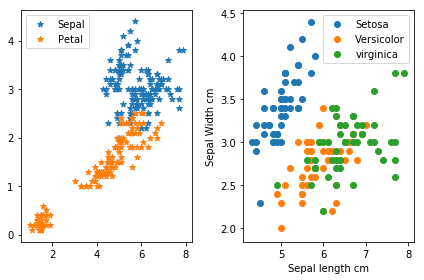

In [55]:
plt.subplot(1,2,1)
plt.scatter(iris.SepalLengthCm,iris['SepalWidthCm'],marker='*',label='Sepal')
plt.scatter(iris.PetalLengthCm,iris['PetalWidthCm'],marker='*',label='Petal')
plt.legend()
plt.subplot(1,2,2)
plt.scatter(iris.loc[iris.Species=='Iris-setosa','SepalLengthCm'],iris.loc[iris.Species=='Iris-setosa','SepalWidthCm'],label='Setosa')
plt.scatter(iris.loc[iris.Species=='Iris-versicolor','SepalLengthCm'],iris.loc[iris.Species=='Iris-versicolor','SepalWidthCm'],label='Versicolor')
plt.scatter(iris.loc[iris.Species=='Iris-virginica','SepalLengthCm'],iris.loc[iris.Species=='Iris-virginica','SepalWidthCm'],label='virginica')
plt.xlabel('Sepal length cm')
plt.ylabel('Sepal Width cm')
plt.legend()
plt.tight_layout()

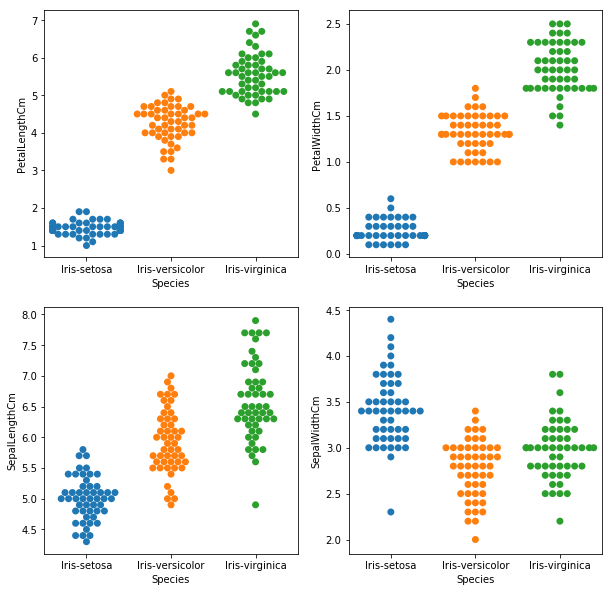

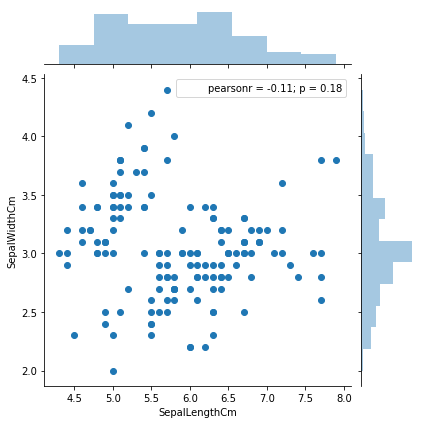

In [56]:
plt.figure(figsize=(10,10))
plt.subplot(2,2,1)
sns.swarmplot(x='Species',y='PetalLengthCm',data=iris,size=7)
plt.subplot(2,2,2)
sns.swarmplot(x='Species',y='PetalWidthCm',data=iris,size=7)
plt.subplot(2,2,3)
sns.swarmplot(x='Species',y='SepalLengthCm',data=iris,size=7)
plt.subplot(2,2,4)
sns.swarmplot(x='Species',y='SepalWidthCm',data=iris,size=7)
plt.show()
sns.jointplot(x='SepalLengthCm',y='SepalWidthCm',data=iris)
plt.show()



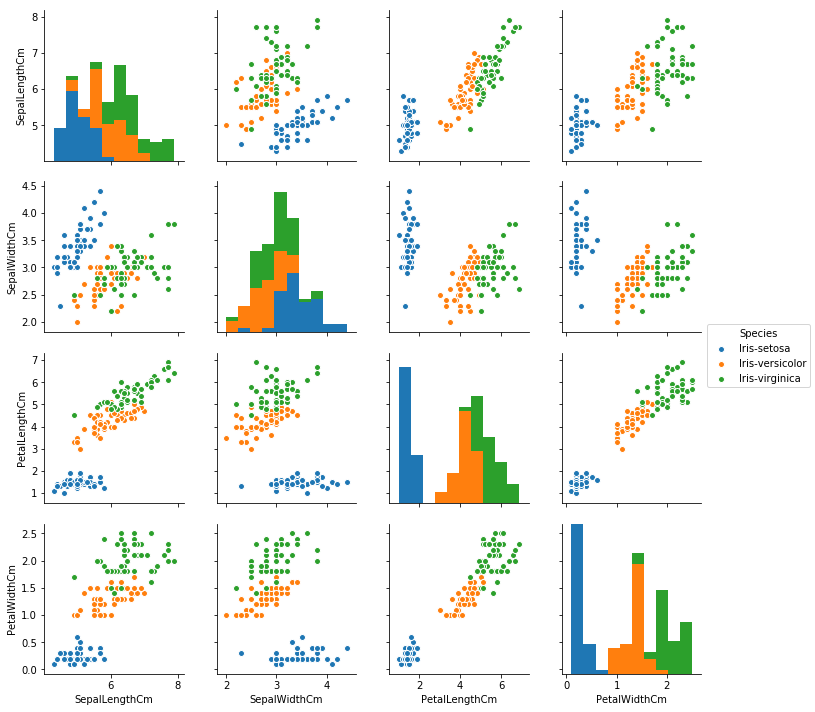

In [57]:
sns.pairplot(iris,hue='Species')

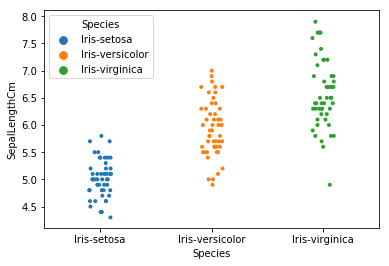

In [58]:
sns.stripplot(x='Species',y='SepalLengthCm',data=iris,hue='Species',size=4,jitter=True)

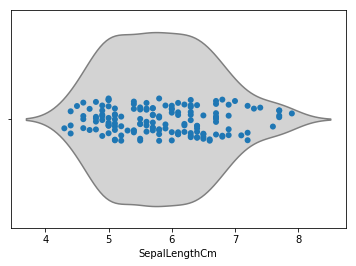

In [59]:
sns.violinplot(x='SepalLengthCm',data=iris,inner=None,color='lightgray')
sns.stripplot(x='SepalLengthCm',data=iris,size=6,jitter=True)

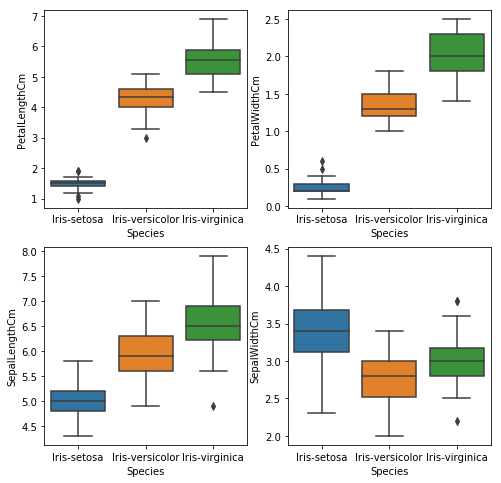

In [60]:
plt.figure(figsize=(8,8))
plt.subplot(2,2,1)
sns.boxplot(x='Species',y='PetalLengthCm',data=iris)
plt.subplot(2,2,2)
sns.boxplot(x='Species',y='PetalWidthCm',data=iris)
plt.subplot(2,2,3)
sns.boxplot(x='Species',y='SepalLengthCm',data=iris)
plt.subplot(2,2,4)
sns.boxplot(x='Species',y='SepalWidthCm',data=iris)








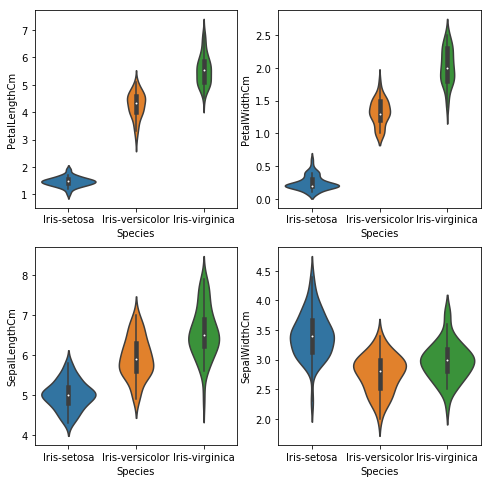

In [61]:
plt.figure(figsize=(8,8))
plt.subplot(2,2,1)
sns.violinplot(x='Species',y='PetalLengthCm',data=iris)
plt.subplot(2,2,2)
sns.violinplot(x='Species',y='PetalWidthCm',data=iris)
plt.subplot(2,2,3)
sns.violinplot(x='Species',y='SepalLengthCm',data=iris)
plt.subplot(2,2,4)
sns.violinplot(x='Species',y='SepalWidthCm',data=iris)

In [62]:
#Verifying the boxplot to see the ranges of values of each species
print(iris.loc[iris.Species=='Iris-setosa','PetalLengthCm'])
print(iris.loc[iris.Species=='Iris-versicolor','PetalLengthCm'])
print(iris.loc[iris.Species=='Iris-virginica','PetalLengthCm'])

Id
1     1.4
2     1.4
3     1.3
4     1.5
5     1.4
6     1.7
7     1.4
8     1.5
9     1.4
10    1.5
11    1.5
12    1.6
13    1.4
14    1.1
15    1.2
16    1.5
17    1.3
18    1.4
19    1.7
20    1.5
21    1.7
22    1.5
23    1.0
24    1.7
25    1.9
26    1.6
27    1.6
28    1.5
29    1.4
30    1.6
31    1.6
32    1.5
33    1.5
34    1.4
35    1.5
36    1.2
37    1.3
38    1.5
39    1.3
40    1.5
41    1.3
42    1.3
43    1.3
44    1.6
45    1.9
46    1.4
47    1.6
48    1.4
49    1.5
50    1.4
Name: PetalLengthCm, dtype: float64
Id
51     4.7
52     4.5
53     4.9
54     4.0
55     4.6
56     4.5
57     4.7
58     3.3
59     4.6
60     3.9
61     3.5
62     4.2
63     4.0
64     4.7
65     3.6
66     4.4
67     4.5
68     4.1
69     4.5
70     3.9
71     4.8
72     4.0
73     4.9
74     4.7
75     4.3
76     4.4
77     4.8
78     5.0
79     4.5
80     3.5
81     3.8
82     3.7
83     3.9
84     5.1
85     4.5
86     4.5
87     4.7
88     4.4
89     4.1
90     4.0
91     4.4
92     

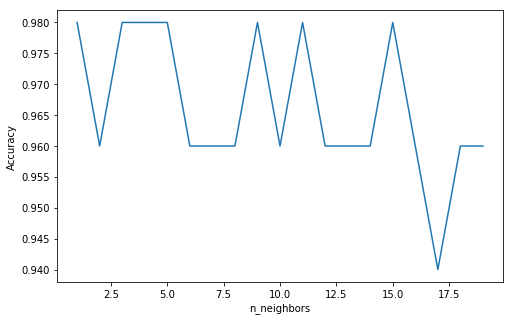

In [63]:
#Splitting the dataset into training set and test set
x=iris.iloc[:,:-1].values
y=iris.iloc[:,-1].values

X_train,X_test,y_train,y_test=train_test_split(x,y,test_size=0.33,random_state=21,stratify=y)
#Finding the best value of n_neighbors to achieve highest accuracy
x_range=[]
y_range=[]
for i in range(1,20):
    knn=KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train,y_train)
    y_pred=knn.predict(X_test)
    y_range.append((metrics.accuracy_score(y_pred,y_test)))
    x_range.append(i)
plt.figure(figsize=(8,5))
plt.plot(x_range,y_range)
plt.xlabel('n_neighbors')
plt.ylabel('Accuracy')
plt.show()



In [66]:
#From above plot we can see that the Accuracy is higest at value k=4(approx.)
knn=KNeighborsClassifier(n_neighbors=4)
knn.fit(X_train,y_train)
y_pred=knn.predict(X_test)
print(y_pred)
print('\nThe accuracy of the KNN is-',(metrics.accuracy_score(y_pred,y_test)))


['Iris-virginica' 'Iris-virginica' 'Iris-virginica' 'Iris-virginica'
 'Iris-versicolor' 'Iris-setosa' 'Iris-versicolor' 'Iris-setosa'
 'Iris-setosa' 'Iris-virginica' 'Iris-setosa' 'Iris-versicolor'
 'Iris-setosa' 'Iris-versicolor' 'Iris-virginica' 'Iris-setosa'
 'Iris-setosa' 'Iris-setosa' 'Iris-versicolor' 'Iris-setosa'
 'Iris-virginica' 'Iris-versicolor' 'Iris-setosa' 'Iris-versicolor'
 'Iris-setosa' 'Iris-virginica' 'Iris-setosa' 'Iris-setosa'
 'Iris-versicolor' 'Iris-virginica' 'Iris-virginica' 'Iris-setosa'
 'Iris-virginica' 'Iris-virginica' 'Iris-virginica' 'Iris-virginica'
 'Iris-versicolor' 'Iris-versicolor' 'Iris-versicolor' 'Iris-versicolor'
 'Iris-versicolor' 'Iris-setosa' 'Iris-virginica' 'Iris-versicolor'
 'Iris-setosa' 'Iris-virginica' 'Iris-virginica' 'Iris-versicolor'
 'Iris-virginica' 'Iris-versicolor']

The accuracy of the KNN is- 0.98


In [65]:
pd.Series(y_pred).value_counts()

Iris-virginica     18
Iris-setosa        16
Iris-versicolor    16
dtype: int64